In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('athlete_events.csv')
df = pd.DataFrame(data)

#print(df.info())
#print(df.describe())
#print(df.head())

In [2]:
# get a list of all the unique values in the data set

#names = df['Name'].unique()
#print(len(names))
#print(df.Name.nunique())

for x in df.columns:
    a = str(x)
    s = str(df[x].nunique())
    print(a + ' = ' + s)

ID = 135571
Name = 134732
Sex = 2
Age = 74
Height = 95
Weight = 220
Team = 1184
NOC = 230
Games = 51
Year = 35
Season = 2
City = 42
Sport = 66
Event = 765
Medal = 3


       Men  Women    diff
Year                     
1896   143    NaN     NaN
1900   591   13.0   578.0
1904   476   10.0   466.0
1906   452    6.0   446.0
1908   815   16.0   799.0
1912   911   30.0   881.0
1920  1264   44.0  1220.0
1924   910   52.0   858.0
1928   720  103.0   617.0
1932   671   68.0   603.0
1936   928   97.0   831.0
1948   871  116.0   755.0
1952   875  158.0   717.0
1956   872  171.0   701.0
1960   863  195.0   668.0
1964   969  246.0   723.0
1968   995  261.0   734.0
1972  1119  295.0   824.0
1976  1091  440.0   651.0
1980  1117  485.0   632.0
1984  1150  548.0   602.0
1988  1228  617.0   611.0
1992  1339  691.0   648.0
1994   223  108.0   115.0
1996  1078  764.0   314.0
1998   251  189.0    62.0
2000  1124  880.0   244.0
2002   270  208.0    62.0
2004  1103  898.0   205.0
2006   295  231.0    64.0
2008  1116  932.0   184.0
2010   291  229.0    62.0
2012  1023  918.0   105.0
2014   332  265.0    67.0
2016  1054  969.0    85.0


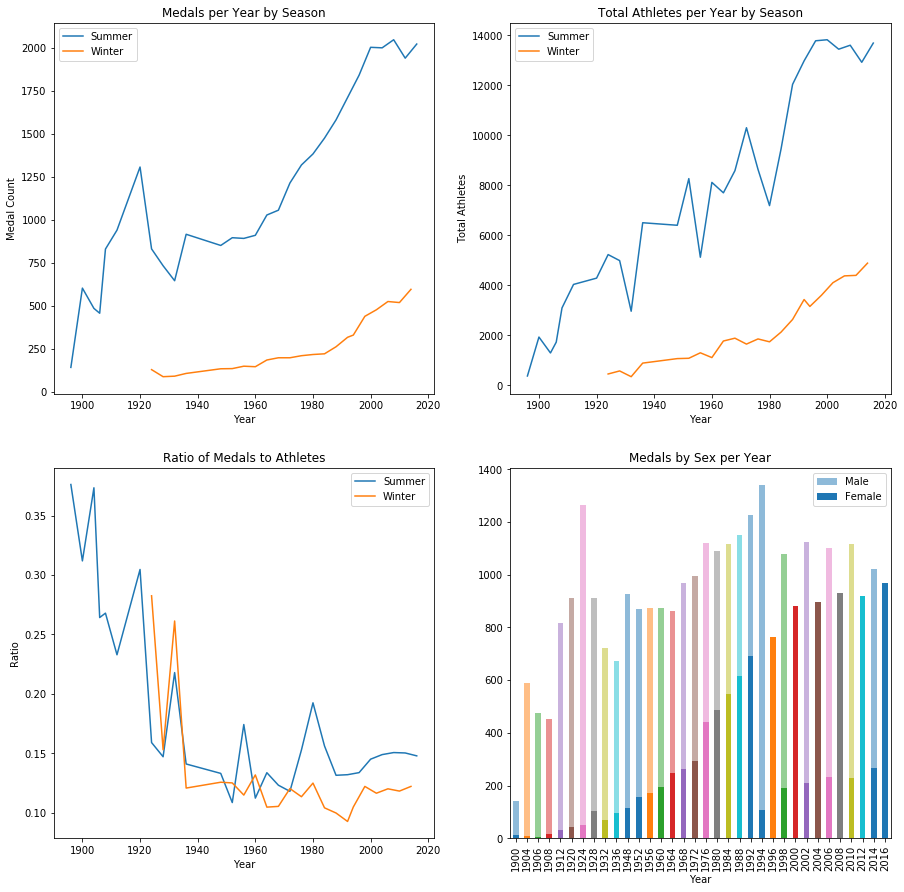

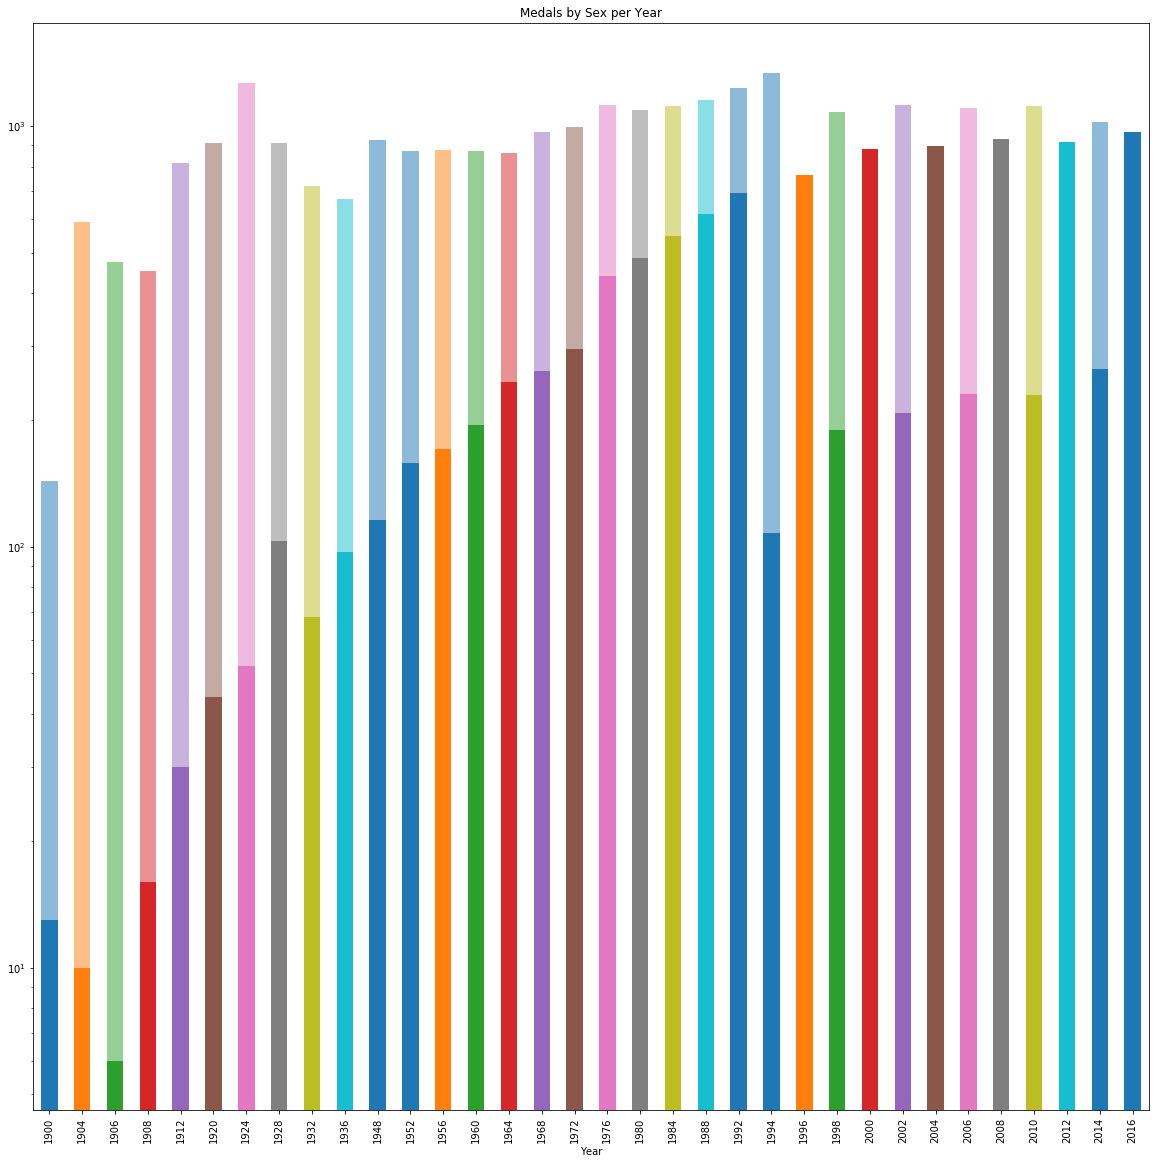

In [3]:
# medals by year separated by season
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
summer_medals_by_year = summer.groupby('Year')['Medal'].count()
winter_medals_by_year = winter.groupby('Year')['Medal'].count()
sum_of_summer_athletes_per_year = summer.groupby('Year')['Name'].count()
sum_of_winter_athletes_per_year = winter.groupby('Year')['Name'].count()
#print(summer_medals_by_year)
#print(winter_medals_by_year)
#print(sum_of_summer_athletes_per_year)
#print(sum_of_winter_athletes_per_year)

#medals per year by season 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
summer_medals_by_year.plot(kind='line', ax=ax1)
winter_medals_by_year.plot(kind='line', ax=ax1, title='Medals per Year by Season')
ax1.set_ylabel('Medal Count')
leg = ax1.legend(['Summer', 'Winter'])

#total athletes per year by sesason
sum_of_summer_athletes_per_year.plot(kind='line', ax=ax2)
sum_of_winter_athletes_per_year.plot(kind='line', ax=ax2, title='Total Athletes per Year by Season')
ax2.set_ylabel('Total Athletes')
leg = ax2.legend(['Summer', 'Winter'])

#ratio of medals to athlete per year
ratio_summer = summer_medals_by_year/sum_of_summer_athletes_per_year
ratio_summer.plot(kind='line', ax=ax3)
ratio_winter = winter_medals_by_year/sum_of_winter_athletes_per_year
ratio_winter.plot(kind='line', ax=ax3, title='Ratio of Medals to Athletes')
ax3.set_ylabel('Ratio')
leg = ax3.legend(['Summer', 'Winter'])

#men vs women medals by year
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
mens_medals = men.groupby('Year')['Medal'].count()
womens_medals = women.groupby('Year')['Medal'].count()

df1 =  pd.concat([mens_medals, womens_medals], axis=1)
df1.columns = ['Men', 'Women']
df1['diff'] = df1['Men'] - df1['Women']
print(df1)
mens_medals.plot(kind='bar', ax=ax4, alpha=.5)
womens_medals.plot(kind='bar', ax=ax4, title='Medals by Sex per Year')
leg = ax4.legend(['Male', 'Female'])

plt.show()
# there is something going wrong with the 4th plot - the womens data is too large after 2000.....
fig = plt.figure(figsize=(20,20))
mens_medals.plot(kind='bar', alpha=.5, logy=True)
womens_medals.plot(kind='bar', title='Medals by Sex per Year', logy=True)
plt.show()

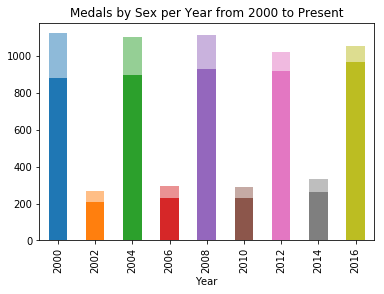

In [4]:


#show bar plot of medals by sex per year from 2000 to current
men_2000 = df[(df['Sex'] == 'M') & (df['Year'] >= 2000)]
women_2000 = df[(df['Sex'] == 'F') & (df['Year'] >= 2000)]
#men_2000 = men[men['Year'] >= 2000]
#women_2000 = women[women['Year'] >= 2000]
mens_medals = men_2000.groupby('Year')['Medal'].count()
womens_medals = women_2000.groupby('Year')['Medal'].count()
mens_medals.plot(kind='bar', alpha=.5)
womens_medals.plot(kind='bar', title='Medals by Sex per Year from 2000 to Present')
leg = ax4.legend(['Male', 'Female'])

plt.show()

  Country  Medal Counts
0     USA          5637
1     URS          2503
2     GER          2165
3     GBR          2068
4     FRA          1777
5     ITA          1637
6     SWE          1536
7     CAN          1352
8     AUS          1320
9     RUS          1165
Medal  Bronze    Gold  Silver  Totals
NOC                                  
USA    1358.0  2638.0  1641.0  5637.0
URS     689.0  1082.0   732.0  2503.0
GER     746.0   745.0   674.0  2165.0
GBR     651.0   678.0   739.0  2068.0
FRA     666.0   501.0   610.0  1777.0
ITA     531.0   575.0   531.0  1637.0
SWE     535.0   479.0   522.0  1536.0
CAN     451.0   463.0   438.0  1352.0
AUS     517.0   348.0   455.0  1320.0
RUS     408.0   390.0   367.0  1165.0


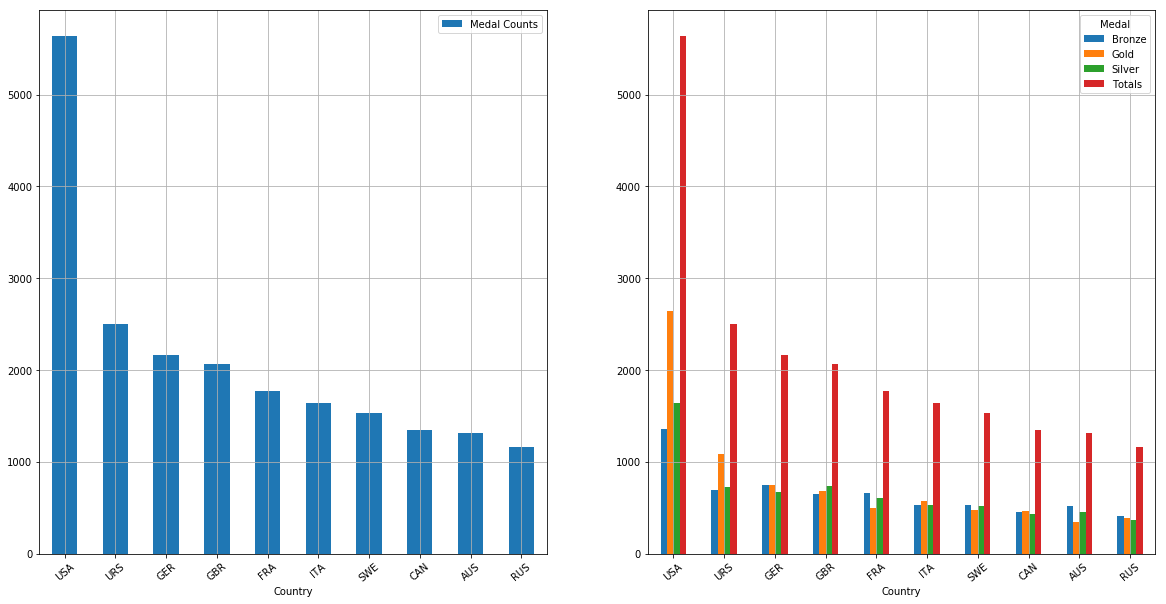

In [5]:
#grab top 10 winningest countries
team = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
team = team.reset_index()
team.columns = ['Country', 'Medal Counts']
#print(team)
top_medals = team.iloc[0:10]
print(top_medals)
#print(top_medals.nunique())
#label = top_medals.Country
#top_medals.plot(x='Country', kind='bar', rot=40)
#plt.show()

#separate top 10 countries by medal
counted = df.pivot_table(index='NOC', columns='Medal', values='Event', aggfunc='count')
counted['Totals'] = counted.sum(axis='columns')
#print(counted)
sort_counted = counted.sort_values('Totals', ascending=False)
top_counted = sort_counted.iloc[0:10]
print(top_counted)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
top_medals.plot(x='Country', kind='bar', rot=40, ax=ax1, grid=True)
top_counted.plot(kind='bar', rot=40, ax=ax2, grid=True)
plt.xlabel('Country')
plt.show()


In [6]:
#sort by year and NOC
athletes_per_year = df.groupby('Year')['Name'].count()
#print(athletes_per_year)
grouped_NOC = df.groupby(['Year','NOC'])['Name', 'Medal'].count()
merge1 = pd.merge(athletes_per_year.to_frame(), df[['Year', 'NOC', 'Medal']], how='outer', on='Year')
print(merge1)

#final_group = merge1[['Year', 'Name', 'Medal_x', 'Medal_y', 'NOC_y']]
#final_group.columns = ['Year', 'Total Athletes', 'Total Medal Count', 'Medal', 'Country']
merge1 = merge1.set_index(['Year', 'NOC'])
merge1 = merge1.sort_index()
#print(merge1)
#print(final_group)
#print(grouped_NOC)

#attempted to organize data by year and country and create a column to show percentage represented by each country and 
#percentage of medals won for that year

#for x, y in grouped_NOC.index:



        Year   Name  NOC   Medal
0       1896    380  GRE     NaN
1       1896    380  GRE     NaN
2       1896    380  GRE     NaN
3       1896    380  GRE     NaN
4       1896    380  GRE     NaN
5       1896    380  GRE  Silver
6       1896    380  GRE    Gold
7       1896    380  GRE     NaN
8       1896    380  GRE     NaN
9       1896    380  GRE     NaN
10      1896    380  GBR  Bronze
11      1896    380  GBR     NaN
12      1896    380  GBR     NaN
13      1896    380  SUI     NaN
14      1896    380  GRE     NaN
15      1896    380  USA  Silver
16      1896    380  USA     NaN
17      1896    380  GER     NaN
18      1896    380  GER     NaN
19      1896    380  GER    Gold
20      1896    380  GER     NaN
21      1896    380  GER    Gold
22      1896    380  GER     NaN
23      1896    380  GER     NaN
24      1896    380  GBR    Gold
25      1896    380  GBR    Gold
26      1896    380  USA    Gold
27      1896    380  USA    Gold
28      1896    380  FRA  Silver
29      18

5637
3668
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
CAN     9733
JPN     8444
SWE     8339
AUS     7638
HUN     6607
POL     6207
SUI     6150
NED     5839
URS     5685
FIN     5467
ESP     5313
RUS     5143
CHN     5141
AUT     5141
NOR     4960
KOR     4464
ROU     4405
TCH     4404
BEL     3857
BRA     3848
DEN     3570
BUL     3530
FRG     3315
ARG     3297
GRE     3181
       ...  
YEM       32
SOM       32
MTN       29
LCA       28
SOL       27
FSM       26
PLW       25
PLE       21
GBS       21
WIF       20
DMA       19
COM       19
CPV       18
STP       15
MHL       14
NRU       13
RHO       12
ROT       12
KIR       11
YAR       11
CRT       11
BRU       10
TLS        9
KOS        8
TUV        7
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: NOC, Length: 230, dtype: int64


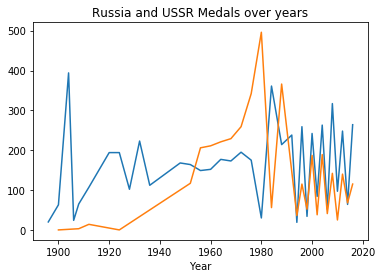

In [7]:
#grab USA medals alone
USA_grouped = df.loc[df.NOC == 'USA'].groupby('Year').count()
print(USA_grouped.Medal.sum())

#grab RUS medals alone
RUS_grouped = df.loc[(df.NOC == 'RUS') | (df.NOC == 'URS')].groupby('Year').count()
print(RUS_grouped.Medal.sum())

#check to make sure RUS was RUS the whole time and nothing else
rus_check = df['NOC'].value_counts()
print(rus_check)

#plot USA and RUS medals over time
fig, ax = plt.subplots(1)
USA_grouped.Medal.plot(x='Year', kind='line', title='USA Medals over the years', ax=ax)
RUS_grouped.Medal.plot(x='Year', kind='line', title='Russia and USSR Medals over years')
plt.show()

# notice that 1904 sticks out significantly....And the oscillation due to the winter olympic after 1992

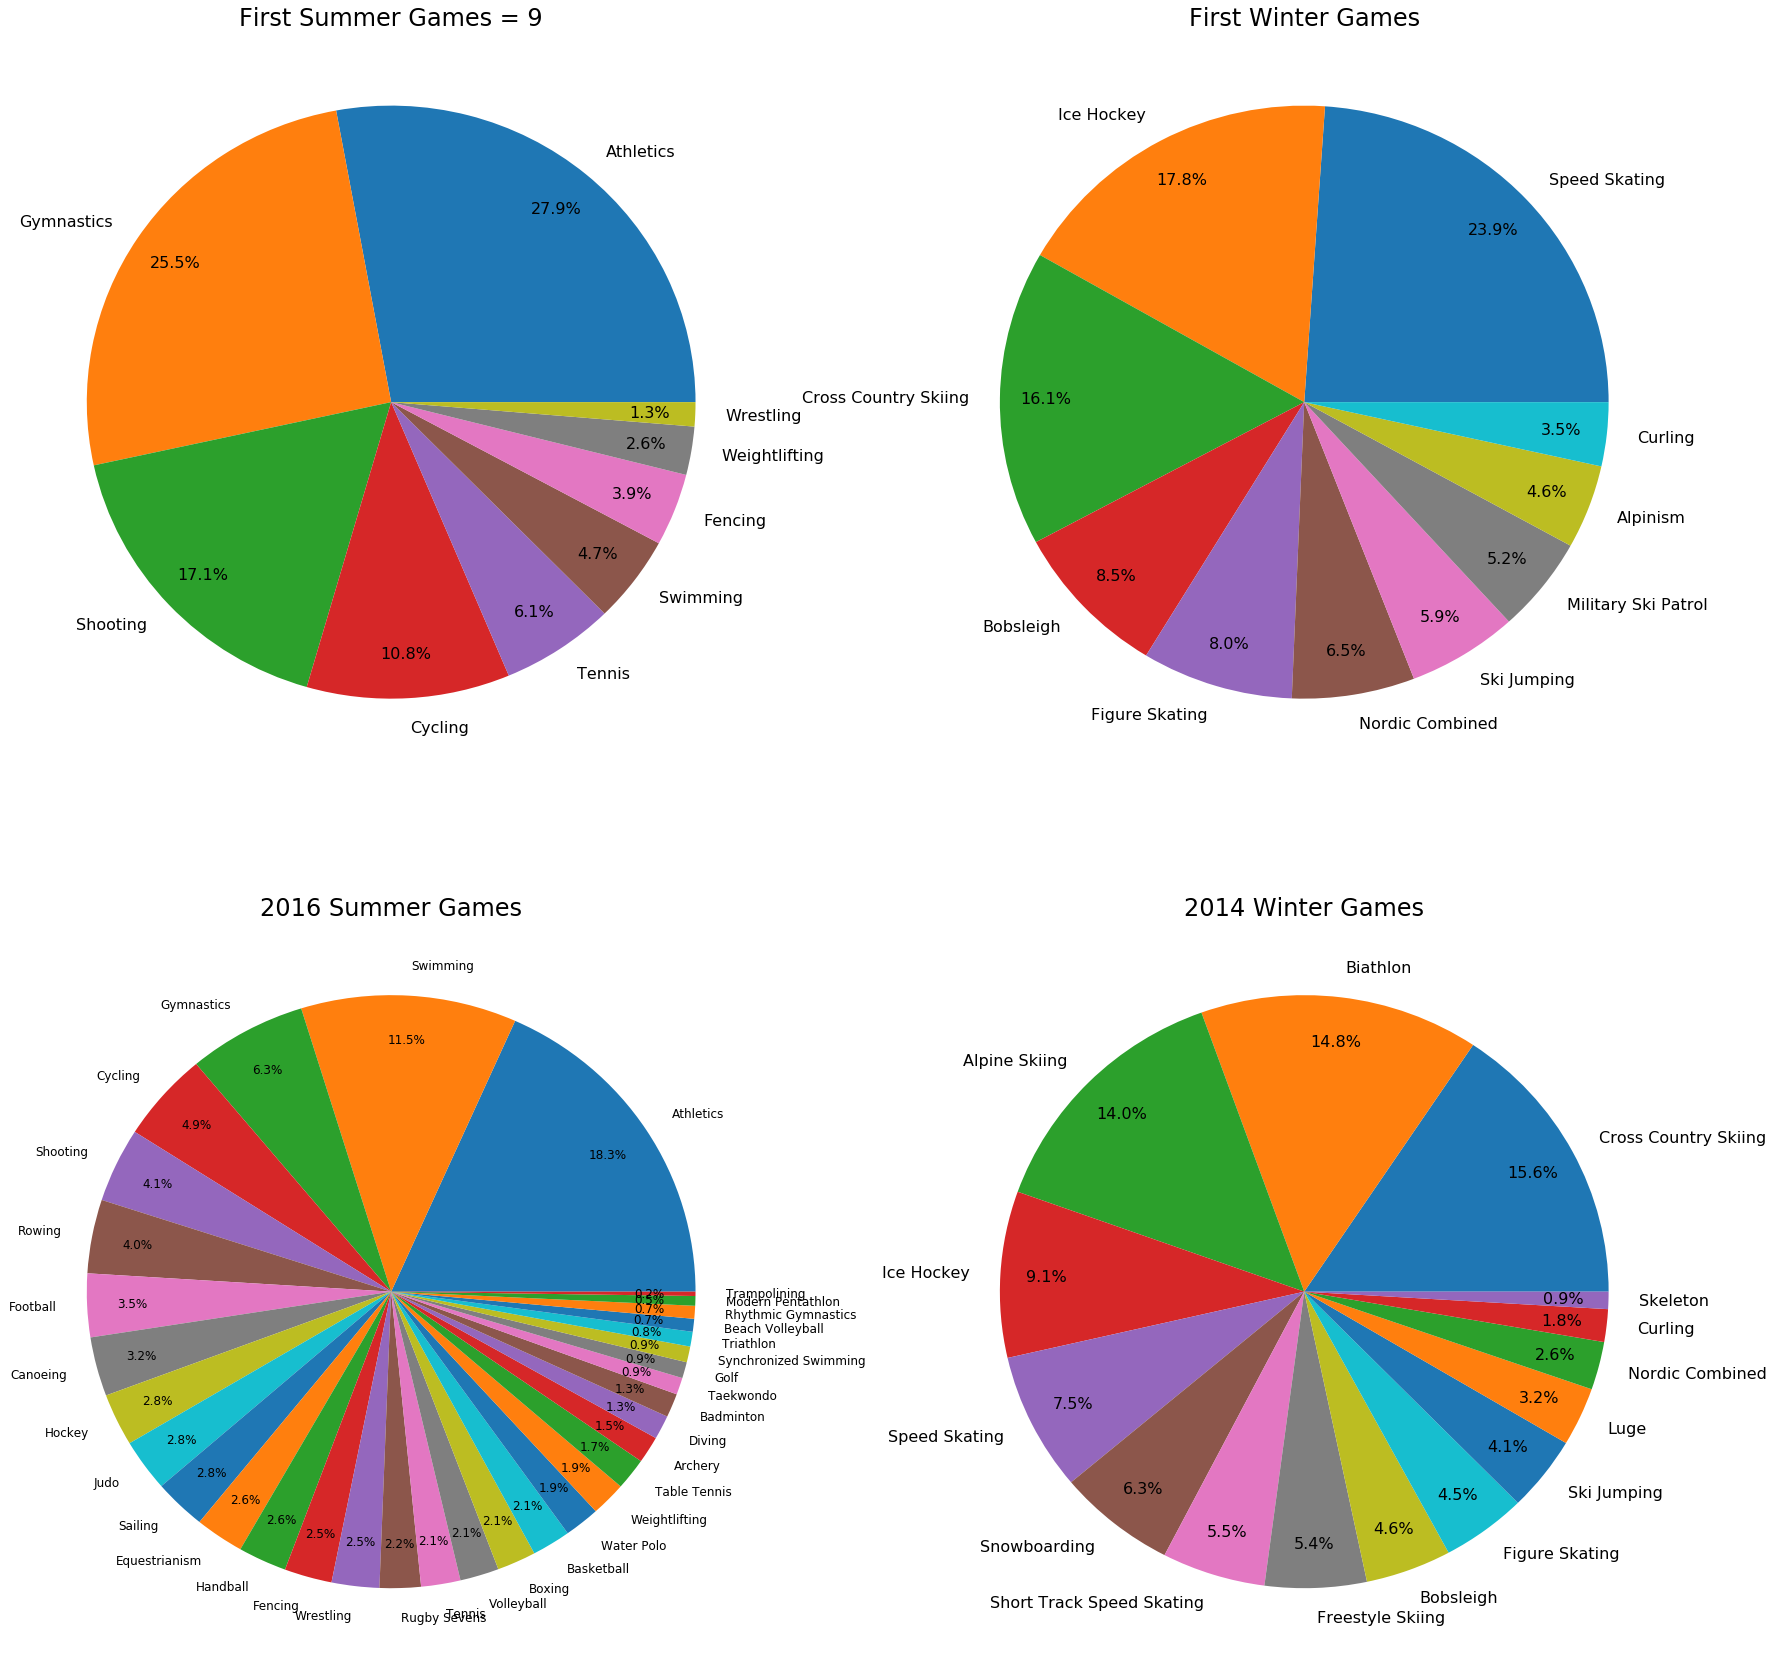

In [12]:
# show pie charts for sports in first year vs most recent year for winter and summer
# first year (summer = 1896)(winter = 1924)

df_by_year_season = df.groupby(['Year', 'Season']).count()
#print(df_by_year_season.head(10))
#print(df_by_year_season.tail(10))
first_summer = df[(df['Season'] == 'Summer') & (df['Year'] == 1896)]
first_winter = df[(df['Season'] == 'Winter') & (df['Year'] == 1924)]

first_summer_counts = first_summer.Sport.value_counts()
first_winter_counts = first_winter.Sport.value_counts()
#print(first_summer_counts)

summer1label = first_summer_counts.index.tolist()
winter1label = first_winter_counts.index.tolist()

#sports for most recent olympics (summer=2016)(winter=2014)
summer2016 = df[(df['Season'] == 'Summer') & (df['Year'] == 2016)]
summer2016_counts = summer2016.Sport.value_counts()
summer2016label = summer2016_counts.index.tolist()

winter2014 = df[(df['Season'] == 'Winter') & (df['Year'] == 2014)]
winter2014_counts = winter2014.Sport.value_counts()
winter2014label = winter2014_counts.index.tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 30))
ax1.set_title('First Summer Games = 9', fontsize='24')
ax1.pie(first_summer_counts, labels=summer1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax2.set_title('First Winter Games', fontsize='24')
ax2.pie(first_winter_counts, labels=winter1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax3.set_title('2016 Summer Games', fontsize='24')
ax3.pie(summer2016_counts, labels=summer2016label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12})
ax4.set_title('2014 Winter Games', fontsize='24')
ax4.pie(winter2014_counts, labels=winter2014label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})

plt.show()


In [9]:
#create a data table grouped by year and sport for the first and present games
#print(summer1label)
#print(winter1label)
#print(summer2016label)
#print(winter2014label)

my_dict=dict({'First Summer Games':summer1label, 'First Winter Games':winter1label, '2016 Summer Games':summer2016label, '2014 Winter Games':winter2014label})
pie_table = pd.DataFrame.from_dict(my_dict, orient='index')
print(pie_table.transpose())

   First Summer Games    First Winter Games      2016 Summer Games  \
0           Athletics         Speed Skating              Athletics   
1          Gymnastics            Ice Hockey               Swimming   
2            Shooting  Cross Country Skiing             Gymnastics   
3             Cycling             Bobsleigh                Cycling   
4              Tennis        Figure Skating               Shooting   
5            Swimming       Nordic Combined                 Rowing   
6             Fencing           Ski Jumping               Football   
7       Weightlifting   Military Ski Patrol               Canoeing   
8           Wrestling              Alpinism                 Hockey   
9                None               Curling                   Judo   
10               None                  None                Sailing   
11               None                  None          Equestrianism   
12               None                  None               Handball   
13               Non

In [10]:
5+8+15+26+25+94+148+18+1+8+5+27


380